<a href="https://colab.research.google.com/github/Jahnavi001/cs480student/blob/main/CS480_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

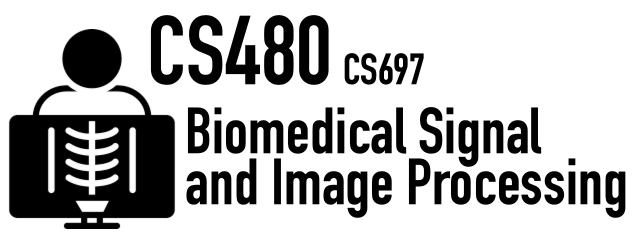
#Assignment 5

In [ ]:
# In this assignment, we will visualize and explore a CT scan!

In [1]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# we are using pydicom, so lets install it!
!pip install pydicom

     |████████████████████████████████| 1.9MB 4.0MB/s 


**Task 1**: Download and visualize data with SliceDrop! [20 Points]

In [3]:
# Please download https://cs480.org/data/ct.zip and extract it on your computer!
# This is a CT scan of an arm in DICOM format.

In [4]:
# 1) Let's explore the data without loading it.
# TODO: Without loading the data, how many slices are there?

In [5]:
# TODO: YOUR_ANSWER 3

In [6]:
# 2) Let's visualize the data with SliceDrop! 
# Go to https://slicedrop.com and drag'n'drop all .dcm files into the browser.
# Please use the 2D sliders to show axial, sagittal, and coronal slices in 3D.

In [7]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by 
# using the Upload image button after double-click.

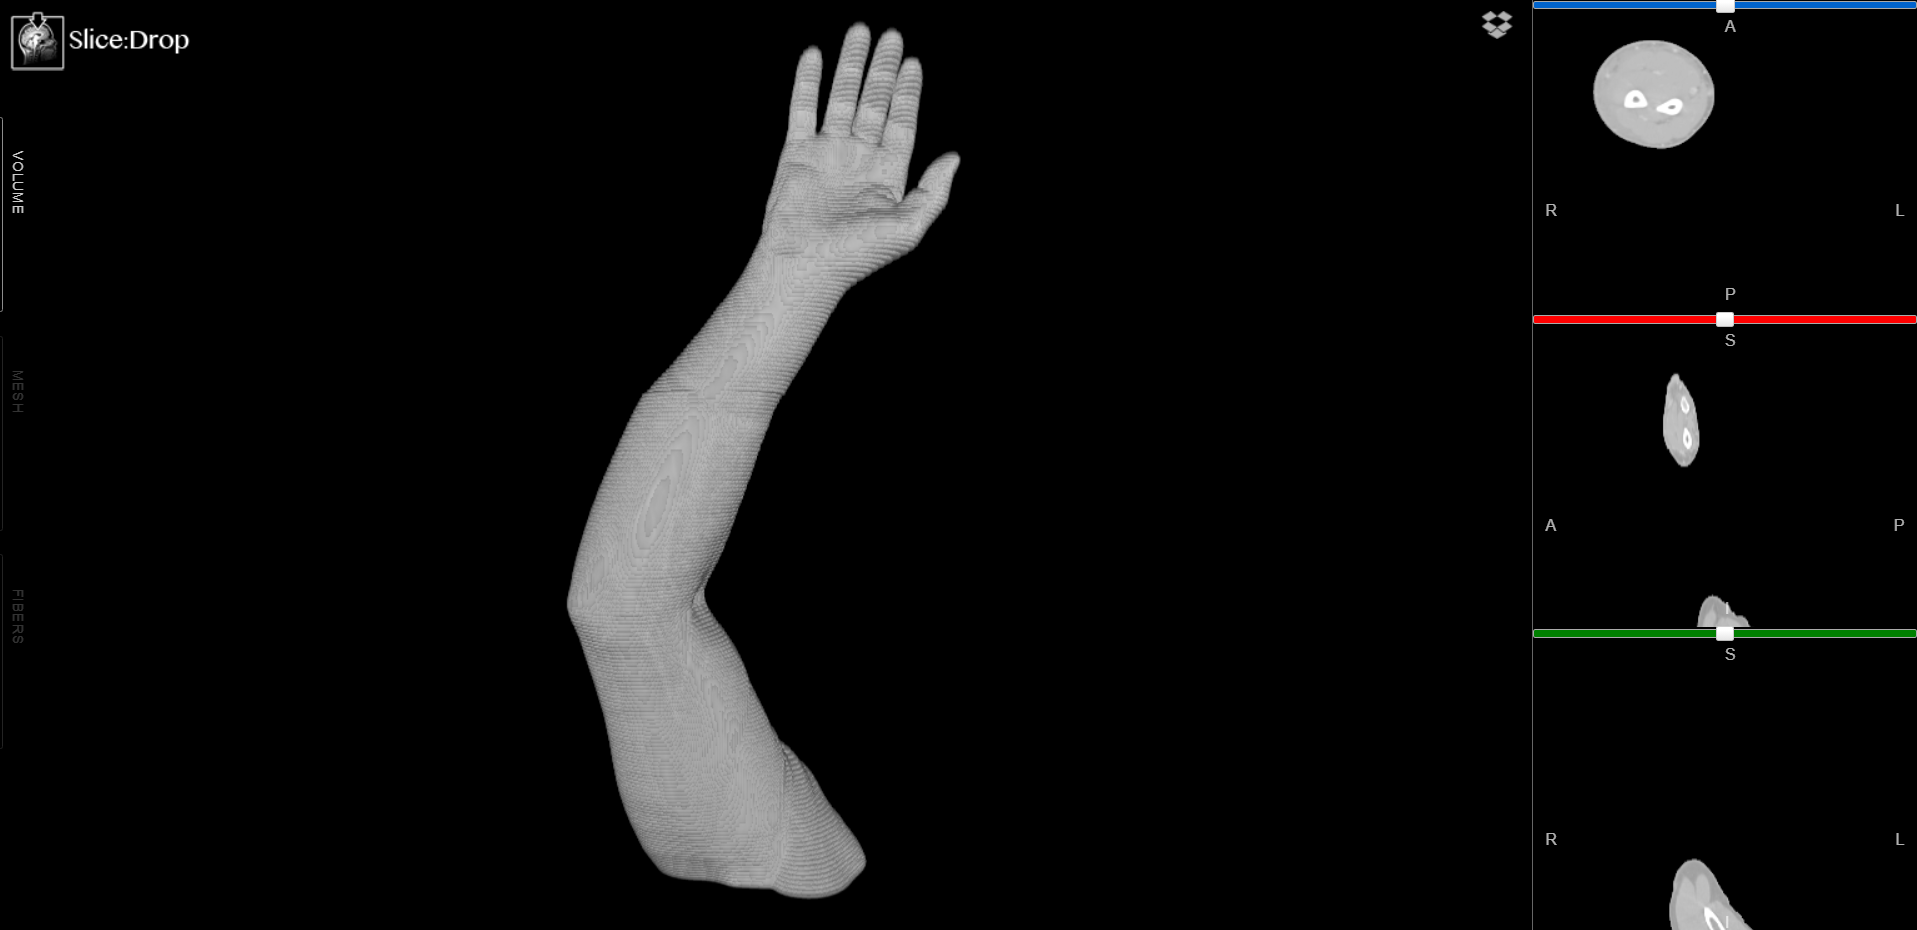

**Task 2**: Load the data using pydicom as a 3D volume and then reslice it! [35 Points]

In [ ]:
# TODO: Please upload ct.zip using the file panel on the left.
# Then use the following snippet to extract the data.

In [54]:
import zipfile
with zipfile.ZipFile('ct.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [ ]:
# 1) Now loop through all the DICOM files and store them in a 3D numpy array.
# Hint: You can either store them in a list first or read the dimensions of a
# single image slice to properly create the 3D numpy array.
# Hint 2: os.listdir(DIR) gives a list of filenames in a directory.
# Hint 2b: This list is not sorted - make sure you sort it.
# Hint 3: The dcmread function loads a single DICOM file.
# Hint 4: You can then use .pixel_array to access the image data.

In [55]:
from pydicom import dcmread
import os;
import pydicom;
#import dicom;
import numpy;
!pip install dicom
!pip install dicom_numpy
import dicom
import sys
import glob

In [88]:
# TODO: YOUR CODE FOR LOADING THE VOLUME AS A 3D NUMPY ARRAY


PathDicom  = '/content/ct/'
lstFilesDCM = []
for dirName, subdirList, fileList in os.walk(PathDicom):
    for filename in fileList:
        if ".dcm" in filename.lower(): 
            lstFilesDCM.append(os.path.join(dirName,filename))
RefDs = pydicom.dcmread(lstFilesDCM[0])
ConstPixelDims = (int(RefDs.Rows), int(RefDs.Columns), len(lstFilesDCM))
ConstPixelSpacing = (float(RefDs.PixelSpacing[0]), float(RefDs.PixelSpacing[1]), float(RefDs.SliceThickness))
sample1=[]

ArrayDicom = numpy.zeros(ConstPixelDims, dtype=RefDs.pixel_array.dtype)
for filenameDCM in lstFilesDCM:
    ds = dcmread(filenameDCM)
    sample1.append(ds)
    ArrayDicom[:, :, lstFilesDCM.index(filenameDCM)] = ds.pixel_array
    


In [58]:
# 2) Now create and show axial, sagittal, and coronal slices from the 3D volume.
# Hint: Please use imshow(XX, cmap='gray') to show the image.
import numpy as np
import matplotlib.pyplot as plt

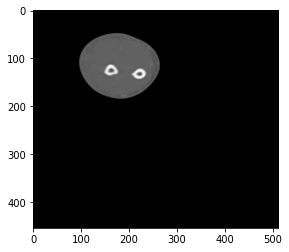

In [64]:
# TODO: YOUR CODE FOR AXIAL
imshow(ArrayDicom[:, :, 32],cmap='gray')

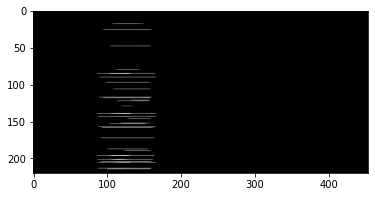

In [66]:
# TODO: YOUR CODE FOR SAGITTAL
imshow(squeeze(ArrayDicom[:,32,:]).T,cmap='gray')

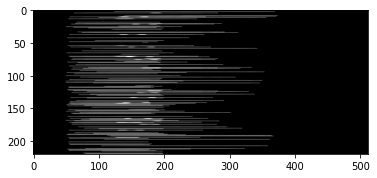

In [67]:
# TODO: YOUR CODE FOR CORONAL
imshow(squeeze(ArrayDicom[192, :, :].T),cmap='gray')

**Task 3**: Use the Window/Level-technique to visualize the data! [45 Points]

In [17]:
# We will now enhance the visualization from above by performing 
# Window/Level adjustment.
# Here is one way of doing that:
#   vmin = level - window/2
#   vmax = level + window/2
#   plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
#   plt.show()

In [18]:
# 1) Please load the Window/Level values from the DICOM file,
# print these values, and then visualize one slice with window/level adjustment.
# Hint: The DICOM header has the following tags.
#   (0028, 1050) Window Center 
#   (0028, 1051) Window Width
# Hint 2: You can use slice[key].value to access DICOM tag values.
# Hint 3: (0028, 1052) Rescale Intercept might be important.

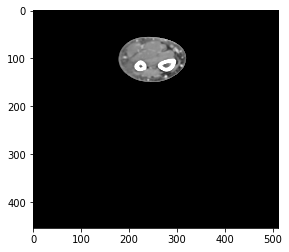

In [76]:
# TODO: YOUR CODE
sl1=sample1[1]
hu_pixels=sl1.pixel_array*sl1.RescaleSlope
level=sl1.WindowCenter
window=sl1.WindowWidth
vmin = level - window/2
vmax = level + window/2
rescale=sl1.RescaleIntercept
plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

In [79]:
print(vmin)
print(vmax)

-175.0
235.0


In [20]:
# 2) Play around with different Window/Level values that enhance
# the visualization.

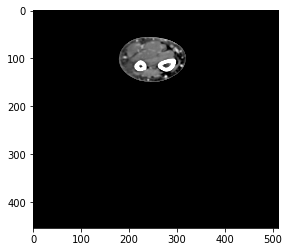

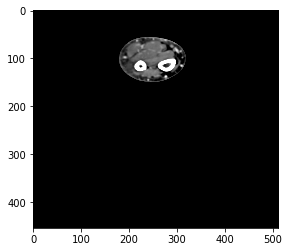

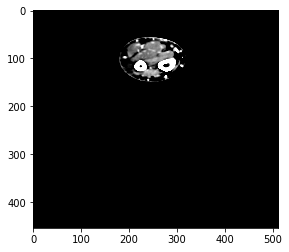

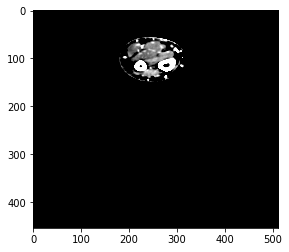

In [81]:
# TODO: YOUR CODE
vmin= -75
vmax= 210
plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()
vmin= -50
vmax = 200
plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()
vmin= 10
vmax=100
plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()
vmin=20
vmax=90
plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

In [75]:
# Which values make sense and why?


-175.0
235.0


In [23]:
# TODO: YOUR ANSWER


In [23]:
# the extreme values have a better level or window image quality than the images with much nearer vmin, vmax values.

**Bonus**: Create segmentations (label maps) for the volume using thresholding HU! [33 Points]

In [24]:
# Similar to Window/Level adjustment for visualization, we can threshold
# the volume to highlight the following components using the Hounsfield Units:
# 1) Fat
# 2) Soft Tissue
# 3) Bones
#
# Please create 3 segmentation masks for these structures.
# Then, please visualize each 3 slices per structure to showcase the segmentation.
# Hint: As a reminder, the following code allows thresholding of a numpy array.
#   new_mask = imagevolume.copy()
#   new_mask[new_mask < XXX] = 0
# Hint2: You might need to cast new_mask to int16 not uint16.

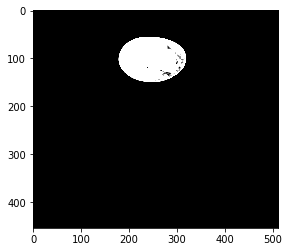

In [83]:
# TODO: YOUR CODE TO SEGMENT FAT
imagevolume= ArrayDicom[:, :, 32]
new_mask = imagevolume.copy()
plt.imshow(hu_pixels + rescale, cmap='gray',vmin=-100,vmax=-50)
plt.show()
#HU units for Fat is -100 to -50

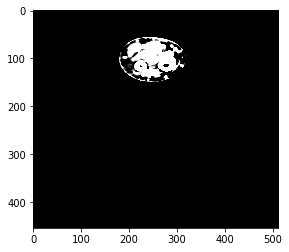

In [85]:
# TODO: YOUR CODE TO SEGMENT SOFT TISSUE
imagevolume= ArrayDicom[:, :, 32]
new_mask = imagevolume.copy()
plt.imshow(hu_pixels + rescale, cmap='gray',vmin=10,vmax=40)
plt.show()
#HU units for tissues/muscle is 10 and 40

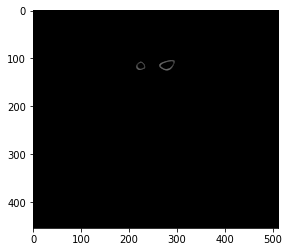

In [86]:
# TODO: YOUR CODE TO SEGMENT BONES
imagevolume= ArrayDicom[:, :, 32]
new_mask = imagevolume.copy()
plt.imshow(hu_pixels + rescale, cmap='gray',vmin=700,vmax=3000)
plt.show()
# HU units for Bones is 700 and 3000

In [28]:
# Are the segmentations good?

In [29]:
# TODO: YOUR ANSWER

In [87]:
#yes segmentations are good

In [30]:
#
# Thank you and Great job!!
#
#                _.---._
#              .'       `.
#              :)       (:
#              \ (@) (@) /
#               \   A   /
#                )     (
#                \"""""/
#                 `._.'
#                  .=.
#          .---._.-.=.-._.---.
#         / ':-(_.-: :-._)-:` \
#        / /' (__.-: :-.__) `\ \
#       / /  (___.-` '-.___)  \ \
#      / /   (___.-'^`-.___)   \ \
#     / /    (___.-'=`-.___)    \ \
#    / /     (____.'=`.____)     \ \
#   / /       (___.'=`.___)       \ \
#  (_.;       `---'.=.`---'       ;._)
#  ;||        __  _.=._  __        ||;
#  ;||       (  `.-.=.-.'  )       ||;
#  ;||       \    `.=.'    /       ||;
#  ;||        \    .=.    /        ||;
#  ;||       .-`.`-._.-'.'-.       ||;
# .:::\      ( ,): O O :(, )      /:::.
# |||| `     / /'`--'--'`\ \     ' ||||
# ''''      / /           \ \      ''''
#          / /             \ \
#         / /               \ \
#        / /                 \ \
#       / /                   \ \
#      / /                     \ \
#     /.'                       `.\
#    (_)'                       `(_)
#     \\.                       .//
#      \\.                     .//
#       \\.                   .//
#        \\.                 .//
#         \\.               .//
#          \\.             .//
#     jgs   \\.           .//
#           ///)         (\\\
#         ,///'           `\\\,
#        ///'               `\\\
#       ""'                   '""